In [ ]:
import os
import sys
import pygsheets
import math
import numpy as np
import pandas as pd
import ams_utilities as au
from openpyxl import load_workbook
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from itertools import cycle
import scipy
%matplotlib notebook
import pyabf
import paq2py
import scipy.interpolate
import matplotlib.pyplot as plt
import scipy.stats as ss
from itertools import product

In [ ]:
import pygsheets
from morph_analysis_jake import *
directory = r"\\163.1.248.177\Root\jswann\Morphologies"

In [ ]:
#list datapath sheets
datapaths = []
for root, subdirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith(".xlsx"):
            temppath=os.path.join(root, filename)
            datapaths.append(temppath)
print(len(datapaths))

In [1]:
#create dataframe
df_all = {}
for i in datapaths:

    df_single_cell = make_param_df(i)

    if i == datapaths[0]:
        df_all = df_single_cell

    else:

        df_all = pd.concat([df_all, df_single_cell], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
#Rename Caitlin columns
columnNames=list(df_all.columns)
columnNames= [i.replace('Cell1','Cell01') for i in columnNames]
columnNames= [i.replace('Cell2','Cell02') for i in columnNames]
columnNames= [i.replace('Cell3','Cell03') for i in columnNames]
columnNames= [i.replace('Cell4','Cell04') for i in columnNames]
df_all.columns=columnNames
#Sort columns into order
df_all=df_all.reindex(sorted(df_all.columns),axis=1)

NameError: name 'datapaths' is not defined

In [2]:
axons=df_all.loc['Axon_length_to_SA_ratio']
len(axons.dropna().index)



AttributeError: 'dict' object has no attribute 'loc'

In [4]:
#Add polar analysis data
df_polar=pd.read_excel('E:\\Jake\\2020-05-31_Morphologies_PolarMetrics.xlsx', indexCol=0)
variableNames=['Dendrite_polar_length_mean',
         'Dendrite_polar_length_std',
         'Dendrite_polar_length_variance',
         'Dendrite_polar_longest_bin']
df_polar.index=variableNames
df_all=pd.concat([df_all,df_polar], join='inner') #This will drop any cells with no dendritic data
df_all

NameError: name 'pd' is not defined

In [5]:
#export to google sheet
creds = r"C:\Users\Packer Lab\Documents\Python Scripts\Code\creds_jake.json"
gc = pygsheets.authorize(service_file=creds)

df = pd.DataFrame()

params = list(df_all.index.values)
df['Parameters'] = params
df.columns = ['Mouse#: Cell']

sh = gc.open('Morph_analysis')

wks = sh[0]
wks.set_dataframe(df, (1,1))
wks.set_dataframe(df_all, (1,2))



NameError: name 'pygsheets' is not defined

In [ ]:
from ams_paq_utilities import *
from ams_utilities import *
import scipy
%matplotlib notebook
import pyabf
import paq2py
import scipy.interpolate
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import scipy.stats as ss
from itertools import product

# Eliminate rows containing redundant, uninformative or incomplete (NaN) data
# In this instance -- will focus on dendritic data and soma perimeter, drop everything ele
dattab = df_all.iloc[24:49,:]
#Drop cells that we've decided are bad
dattab=dattab.drop(['AS035: Cell01',
                    'AS057: Cell03',
                    'AS062: Cell03',
                    'AS063: Cell03',
                    'AS091: Cell03',
                    'AS132: Cell03',
                    'AS143: Cell03',], 1)

# Convert to float array and standardise data ((x - mean)/std)
dattab = au.str_flt(dattab.iloc[:,:])
dattab -= np.mean(dattab)
dattab /= np.std(dattab)

# # Transpose array so variables arranged column-wise
data = dattab.T

# data.columns.names = ["metric"]
# data.index.names = ["cell"]
data



NameError: name 'dattab' is not defined

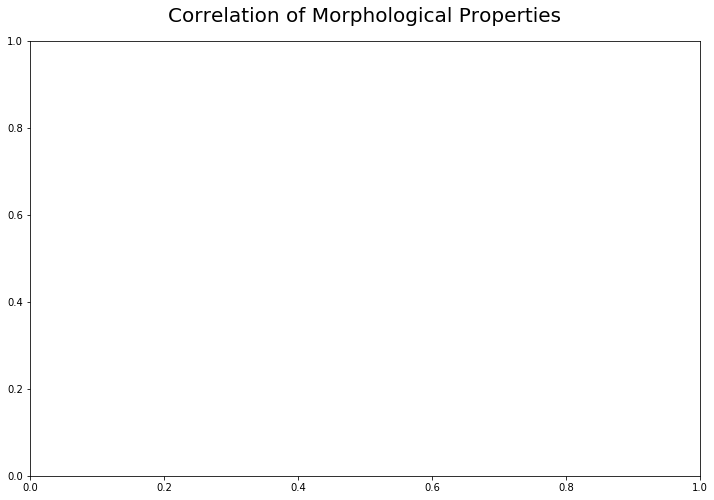

In [7]:
plt.figure(figsize=(12,8))
plt.title('Correlation of Morphological Properties', fontsize=20, y = 1.03);
dattabcor = dattab.T
cor = dattabcor.corr()
# cor = dattab.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.seismic)
plt.show()



In [9]:
# Perform PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data)
pcList=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5','principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10']

principalDf = pd.DataFrame(data=principalComponents, columns = pcList)
principalDf



NameError: name 'data' is not defined

In [11]:
# SANITY CHECK - do values correlate as expected
def corrank(X):
        import itertools
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])
        print(df.sort_values(by='corr',ascending=False))

print ('Top Correlations')
corrank(data)



Top Correlations


NameError: name 'data' is not defined

In [12]:
# # Perform PCA (assuming no of appropriate factors has already been determined)
pca = PCA(n_components = 5).fit(data)
X_pca = pca.transform(data)
PCA_components = pd.DataFrame(X_pca)
plt.subplots()
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA dimensions')
plt.ylabel('Variance ')
plt.title('PCA:  Explained Variance')




NameError: name 'data' is not defined

In [13]:
print(pca.explained_variance_)



AttributeError: 'PCA' object has no attribute 'explained_variance_'

In [14]:
loadings=pd.DataFrame(pca.components_, columns = data.columns, index = ['PC1','PC2','PC3','PC4','PC5'])
loadings.T



AttributeError: 'PCA' object has no attribute 'components_'

NameError: name 'loadings' is not defined

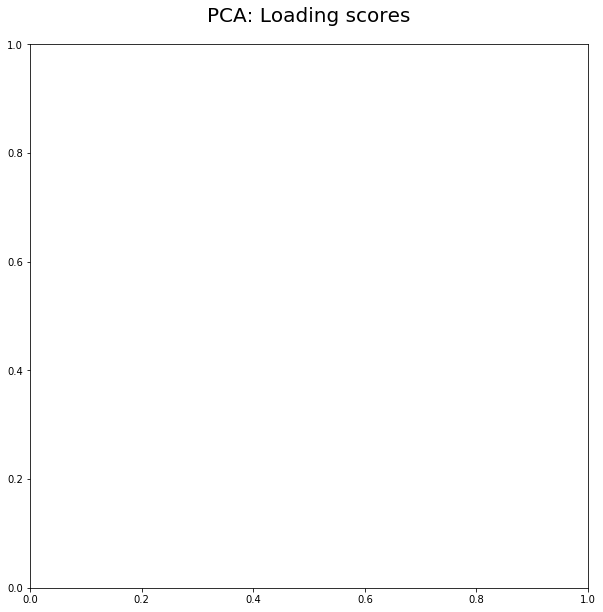

In [15]:
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.title('PCA: Loading scores', fontsize=20, y = 1.03)
sns.heatmap(loadings.T, annot=True, cmap=plt.cm.seismic)
plt.show()



NameError: name 'features' is not defined

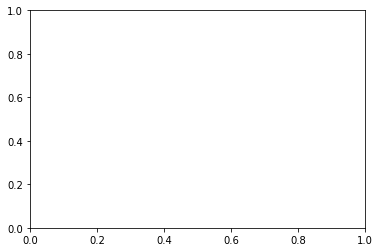

In [16]:
plt.subplots()
plt.scatter(features, pca.explained_variance_, color = 'blue')
plt.plot(features, pca.explained_variance_, color = 'blue')
plt.title('Scree Plot')
plt.xlabel('Dimensions')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()




In [17]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Dimensions')
plt.ylabel('Variance') #for each component
plt.title('Explained Variance')
plt.show()

display(pca.explained_variance_ratio_)



AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

<Figure size 432x288 with 0 Axes>

NameError: name 'PCA_components' is not defined

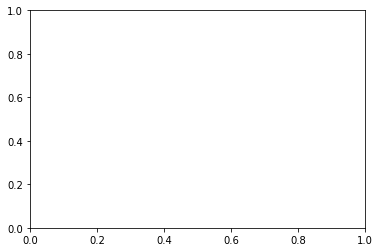

In [18]:
# Create plot of PC space (components 1/2)
fig, ax = plt.subplots()
plt.scatter(PCA_components[0], PCA_components[1], color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.grid()



In [19]:
x = np.array(PCA_components[0])
y = np.array(PCA_components[1])
z = np.array(PCA_components[2])
# w = np.array(PCA_components[3])
# u = np.array(PCA_components[4])


X = np.column_stack((x,y,z))



NameError: name 'PCA_components' is not defined

In [21]:
# Re run PCA on appropraite number of components
pca = PCA(n_components=3)
pca.fit_transform(data)

# Plot relationship between components and original metrics
plt.figure(figsize=(10,5))
plt.title('PCA: Loading scores', fontsize=20, y = 1.03);
PCAweights = pd.DataFrame(pca.components_,columns=data.columns,index = ['PC1','PC2','PC3'])
sns.heatmap(PCAweights.T, annot = True, cmap=plt.cm.seismic)



NameError: name 'data' is not defined

In [23]:
# Create plot of PC space (components 1/2)

P1 = PCA_components[0]
P2 = PCA_components[1]
labels = data.index

fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(P1,P2, color='red')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two Component PCA Space', fontsize = 20)
ax.grid()

for i,type in enumerate(labels):

    x = P1[i]
    y = P2[i]
    plt.text(x+0.003, y+0.003, type, fontsize=9)


plt.show()



NameError: name 'PCA_components' is not defined

In [25]:
# You can assess appropriate number of clusters by identifying 'elbow' in KMeans Inertia plot

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(PCA_components.iloc[:,0:1])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

fig, ax = plt.subplots()
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.xticks(ks)
plt.show()



NameError: name 'PCA_components' is not defined

NameError: name 'X' is not defined

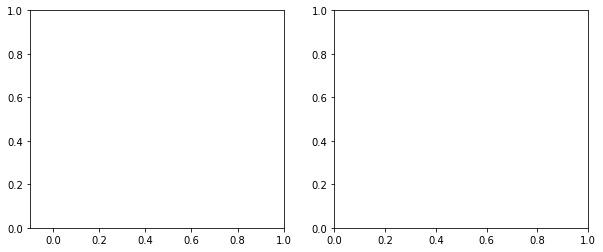

In [27]:
# Sihouette analysis enables you to compare results of K-means for different number of clusters
# Highest silhouette value indicates most variance explained

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 4)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette pot")
    ax1.set_xlabel("Silhouette Cofficient Vlues")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering:  "
                  "n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



NameError: name 'X' is not defined

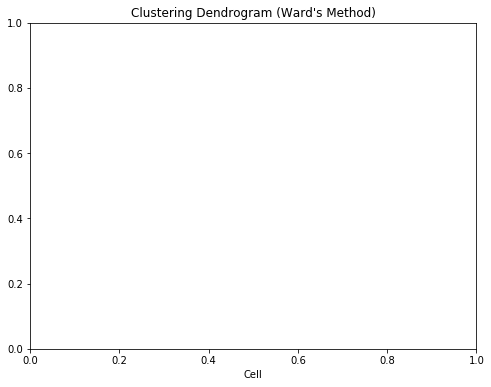

In [29]:
# Ward's method - hierarchical clustering (top down)

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 6))
plt.title("Clustering Dendrogram (Ward's Method)")
plt.xlabel("Cell")
plt
dend = shc.dendrogram(shc.linkage(X, method='ward'))



In [31]:
plt.figure(figsize=(10,10))
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Feature Space for 1st Feature')
plt.ylabel('Feature Space for 2nd Feature')
plt.title('Clustering: Wards Method (n=3)')

labels = data.index

P1 = X[:,0]
P2 = X[:,1]

for i,type in enumerate(labels):

    x = P1[i]
    y = P2[i]
    plt.text(x+0.003, y+0.003, type, fontsize=9)


plt.show()



NameError: name 'AgglomerativeClustering' is not defined

<Figure size 720x720 with 0 Axes>

In [33]:
plt.figure(figsize=(10,10))
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('Feature Space for 1st Feature')
plt.ylabel('Feature Space for 2nd Feature')
plt.title('Clustering: Wards Method (n=3)')

labels = data.index

P1 = X[:,0]
P2 = X[:,1]

for i,type in enumerate(labels):

    x = P1[i]
    y = P2[i]
    plt.text(x+0.003, y+0.003, type, fontsize=9)


plt.show()



NameError: name 'AgglomerativeClustering' is not defined

<Figure size 720x720 with 0 Axes>

In [34]:
df = pd.DataFrame(cluster.labels_, labels)
df.columns = ['Cluster']
df.index.name = 'Cell'

Group1 = df.loc[df['Cluster'] == 0]

Group2 = df.loc[df['Cluster'] == 1]

Group3 = df.loc[df['Cluster'] == 2]

# Group4 = df.loc[df['Cluster'] == 3]

# Group5 = df.loc[df['Cluster'] == 4]

a = pd.DataFrame(Group1.index)
b = pd.DataFrame(Group2.index)
c = pd.DataFrame(Group3.index)
# d = pd.DataFrame(Group4.index)
# e = pd.DataFrame(Group5.index)

clusters = pd.concat([a,b,c], ignore_index=True, axis=1)
clusters.columns = ['Cluster 1', 'Cluster 2', 'Cluster 3']

clusters



NameError: name 'cluster' is not defined

In [ ]:
# Affinity Propagation

# Perform affinity propagation


# Need to figure out how to find optimal cluster value


af = AffinityPropagation(preference = None).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

# Plot result

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Feature space for 1st feature')
plt.ylabel('Feature space for 2nd feature')
plt.show()

